In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from config.project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [37]:
experiment_id = 2
shift = 5

sub_directory = "2025_09_08_Limit"
if experiment_id == 1:
    max_utilization = 1
elif experiment_id == 2:
    max_utilization = 0.9

experiments_file_path = get_data_path(
    sub_directory,
    f"experiments_{max_utilization:.2f}".replace(".", "_")
)

def get_experiment_string(df, experiment_id, shift_numb: int):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Shift {shift_numb}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

df_experiments = pd.read_csv(f"{experiments_file_path}.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev
0,2,0.5,0.5,0.9,0.25,1440,1,1,2


In [38]:
log_file = f"Shift_{shift:02d}.log"
logs_file_path= get_data_path(sub_directory=sub_directory, file_name=f"logs/Experiment_{experiment_id:03d}/" + log_file)


df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=logs_file_path,

)

mask = df_cp_logs["BestSol"].ne(df_cp_logs["BestSol"].shift())  # True, wenn Änderung
df_cp = df_cp_logs[mask | (df_cp_logs.index == df_cp_logs.index[-1])].reset_index(
    drop=True)  # letzen Wert behalten, auch wenn keine Verbesserung


df_cp["ImprovementPct"] = (
    -df_cp["BestSol"].pct_change() * 100
).round(4).fillna(0)

# -0.0 zu 0 machen
df_cp["ImprovementPct"] = df_cp["ImprovementPct"].replace(-0.0, 0.0)

df_cp["Duration"] = df_cp["Time"].diff().fillna(0).round(4)
df_cp

,Time,BestSol,ImprovementPct,Duration
0,0.26,191229.0,0.0000,0.00
1,0.33,96774.0,49.3937,0.07
2,0.35,96660.0,0.1178,0.02
3,0.36,96658.0,0.0021,0.01
4,0.38,96656.0,0.0021,0.02
5,0.43,76879.0,20.4612,0.05
6,0.46,76679.0,0.2601,0.03
7,0.49,76650.0,0.0378,0.03
8,0.51,76544.0,0.1383,0.02
9,0.53,76464.0,0.1045,0.02


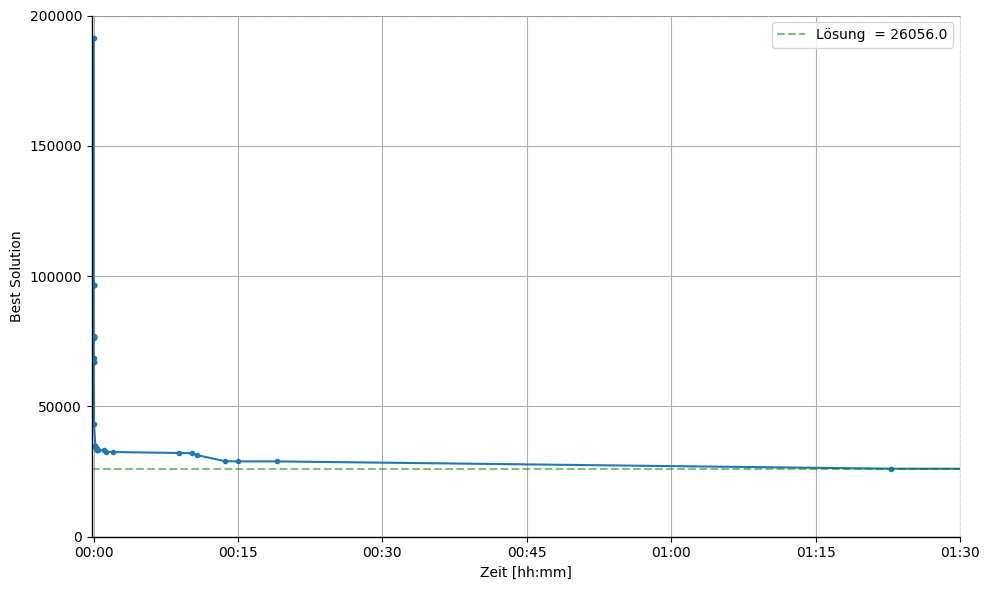

In [43]:
#from src.DataPreprocessing import SimulationDataVisualization
#SimulationDataVisualization.set_latex_style(mono=False)

fig = DataFramePlotGenerator.get_convergence_plot_figure(
    df_cp, time_col="Time", bestsol_col="BestSol",
    granularity="quarter", # title=f"{get_experiment_string(df_experiments, experiment_id, shift)}",
   x_max=60*60*1.5
)
best_val = df_cp["BestSol"].min()

ax = fig.axes[0]
ax.axhline(y=best_val, color="green", linestyle="--", alpha=0.5, label=f"Lösung  = {best_val}")
ax.legend()

file_path = get_data_path("output", f"Konvergenzanalyse_util{max_utilization:.2f}_shift{shift:02d}", as_string=True)
fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png", bbox_inches="tight")

plt.show()

In [40]:
print(f"{get_experiment_string(df_experiments, experiment_id, shift)}")

Shift 5
lateness/deviation = 0.50, tardiness/earliness = 0.50, bottleneck utilization = 0.90 (sigma = 0.25)
